In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint

In [2]:
# 1. Working with files

# 1.1 Read a data file

# First set up the paths
PATH = './example_datafiles/'
FILE_IN = 'data1.csv'

# Then read this to a dataframe
df = pd.read_csv(PATH+FILE_IN, index_col=False)

# 1.2 Write a data file
FILE_OUT = 'data2.csv'
df.to_csv(PATH+FILE_OUT, index=None)

# Show the dataframe
df

,0,1,2,3,4,5,6,7,8,9
0,-0.388173,-0.147401,0.172834,0.095223,0.986469,1.878170,1.297024,-0.414780,-0.871941,0.902043
1,-0.717954,-1.387479,0.256310,-0.642718,0.967369,0.527781,1.147697,-0.628699,-0.933363,-0.537832
2,-0.721229,-0.868733,0.901863,-0.100104,0.013922,1.025115,-0.494322,0.396235,-1.668517,1.825950
3,-2.477050,0.821981,0.050652,0.767555,-2.244635,-0.617112,0.923344,0.786957,0.833512,0.002643
4,0.378843,2.072729,-0.046999,-0.320351,-0.648165,-0.497145,-1.711175,0.224682,-0.329579,0.324459
5,0.318052,-0.268321,0.360677,-0.054359,-0.323788,-1.507966,-2.144364,-0.125828,2.583950,-0.881741
6,-1.082962,-0.679227,-0.678381,0.218769,-0.726866,-0.429580,-0.366159,1.504197,-0.691899,0.711019
7,0.765638,0.204376,0.795461,0.831841,1.248416,-0.074779,0.018754,-0.280192,-0.784082,-0.463033
8,0.078265,-0.272536,0.985487,-1.159446,-0.374033,-1.218967,3.523711,-0.273097,-1.341878,1.208038
9,-0.522868,-1.090225,1.303854,1.097022,-1.916676,0.253762,1.814570,-0.019124,-0.106335,-1.288708


In [3]:
# 2. Dataframes

# Dataframes are indexed like this: [row,column]
# The colon (:) operator is used to get ranges of elements
# In python, index values go from zero <== very important.

# Examples
# 2.1 The first column
df.iloc[:,0]

0   -0.388173
1   -0.717954
2   -0.721229
3   -2.477050
4    0.378843
5    0.318052
6   -1.082962
7    0.765638
8    0.078265
9   -0.522868
Name: 0, dtype: float64

In [4]:
# 2.2 The first row
df.iloc[0,:]

0   -0.388173
1   -0.147401
2    0.172834
3    0.095223
4    0.986469
5    1.878170
6    1.297024
7   -0.414780
8   -0.871941
9    0.902043
Name: 0, dtype: float64

In [5]:
# 2.3 The first two columns
df.iloc[:,0:2]

,0,1
0,-0.388173,-0.147401
1,-0.717954,-1.387479
2,-0.721229,-0.868733
3,-2.477050,0.821981
4,0.378843,2.072729
5,0.318052,-0.268321
6,-1.082962,-0.679227
7,0.765638,0.204376
8,0.078265,-0.272536
9,-0.522868,-1.090225


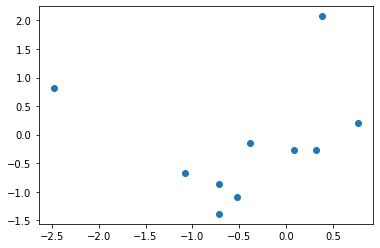

In [6]:
# 3. Plotting

# Plotting requires minimally the following command
# plt.plot(x,y); plt.show()
# where x and y are the independent and dependent variables
# and must be arrays of the same length

# As an example let's set the first two columns as x and y
x = df.iloc[:,0]
y = df.iloc[:,1]
plt.plot(x,y,'o'); plt.show()

# For much more about plotting, see 4_plot-templates.ipynb

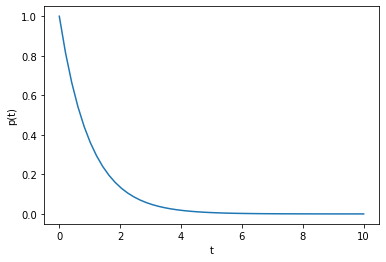

In [7]:
# 4. Solving ODEs

# Standard script to solve ODEs
# using example from 2_introODE_python.ipynb

time = np.linspace(0,10,50)
p0 = 1.0
params = np.array([1.0])

def grads(y, t, params):
    p = y[0]    
    k = params[0]
   
    derivs = [
        -k*p
    ]
    return(derivs)

# Solver requires gradient function, initial values, time axis, and parameters
sol = odeint(grads, p0, time, args=(params,))

plt.plot(time,sol); plt.xlabel('t'); plt.ylabel('p(t)'); plt.show()